In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [18]:
# Membaca dataset
df = pd.read_csv('/content/Klasifikasi Tingkat Kemiskinan di Indonesia.csv', sep=';')

In [16]:
# Menampilkan 5 baris pertama dari dataset
print("\nData Head:")
print(df.head())


Data Head:
  Provinsi       Kab/Kota  P0_Persen  Rata_rata_Lama_Sekolah  \
0     ACEH       Simeulue      18.98                    9.48   
1     ACEH   Aceh Singkil      20.36                    8.68   
2     ACEH   Aceh Selatan      13.18                    8.88   
3     ACEH  Aceh Tenggara      13.41                    9.67   
4     ACEH     Aceh Timur      14.45                    8.21   

   Pengeluaran_per_Kapita    IPM  Umur_Harapan_Hidup  Akses_Sanitasi_Layak  \
0                  7148.0  66.41               65.28                 71.56   
1                  8776.0  69.22               67.43                 69.56   
2                  8180.0  67.44               64.40                 62.55   
3                  8030.0  69.44               68.22                 62.71   
4                  8577.0  67.83               68.74                 66.75   

   Akses_Air_Minim_Layak  Pengangguran_Terbuka  Partisipasi_Angkatan_Kerja  \
0                  87.45                  5.71          

In [17]:
df.rename(columns={
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)': 'P0_Persen',
    'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)': 'Rata_rata_Lama_Sekolah',
    'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)': 'Pengeluaran_per_Kapita',
    'Indeks Pembangunan Manusia': 'IPM',
    'Umur Harapan Hidup (Tahun)': 'Umur_Harapan_Hidup',
    'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak': 'Akses_Sanitasi_Layak',
    'Persentase rumah tangga yang memiliki akses terhadap air minum layak': 'Akses_Air_Minim_Layak',
    'Tingkat Pengangguran Terbuka': 'Pengangguran_Terbuka',
    'Tingkat Partisipasi Angkatan Kerja': 'Partisipasi_Angkatan_Kerja',
    'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)': 'PDRB_Harga_Konstan',
    'Klasifikasi Kemiskinan': 'Klasifikasi_Kemiskinan'
}, inplace=True)

In [8]:
# Mengonversi kolom objek yang berisi angka desimal ke format float
for col in df.select_dtypes(include=['object']).columns[2:]:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Menghapus data yang mengandung nilai kosong
df.dropna(inplace=True)

# Menentukan variabel fitur dan target
X = df.drop(columns=['Provinsi', 'Kab/Kota', 'Klasifikasi_Kemiskinan'])
y = df['Klasifikasi_Kemiskinan']

In [10]:
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
# Model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print(f"Akurasi KNN: {accuracy_score(y_test, y_pred_knn):.2f}")


KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        91
         1.0       0.91      0.83      0.87        12

    accuracy                           0.97       103
   macro avg       0.94      0.91      0.93       103
weighted avg       0.97      0.97      0.97       103

Akurasi KNN: 0.97


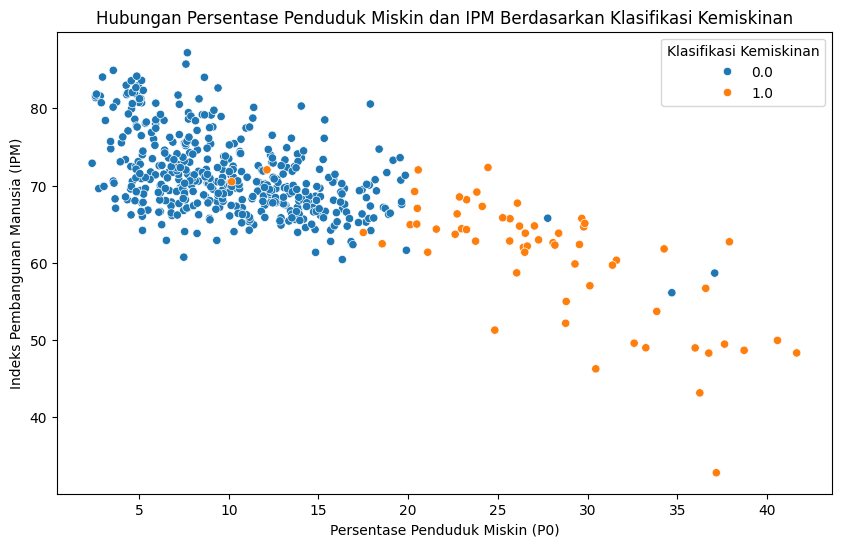

In [12]:
# Visualisasi hubungan antara kemiskinan dan IPM
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='P0_Persen', y='IPM', hue='Klasifikasi_Kemiskinan')
plt.title('Hubungan Persentase Penduduk Miskin dan IPM Berdasarkan Klasifikasi Kemiskinan')
plt.xlabel('Persentase Penduduk Miskin (P0)')
plt.ylabel('Indeks Pembangunan Manusia (IPM)')
plt.legend(title='Klasifikasi Kemiskinan')
plt.show()


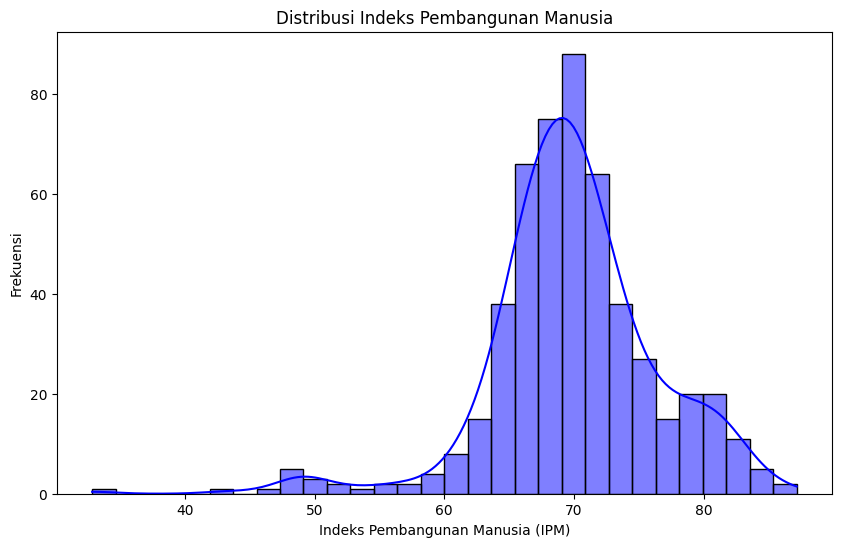

In [13]:
# Visualisasi distribusi IPM
plt.figure(figsize=(10, 6))
sns.histplot(df['IPM'], bins=30, kde=True, color='blue')
plt.title('Distribusi Indeks Pembangunan Manusia')
plt.xlabel('Indeks Pembangunan Manusia (IPM)')
plt.ylabel('Frekuensi')
plt.show()


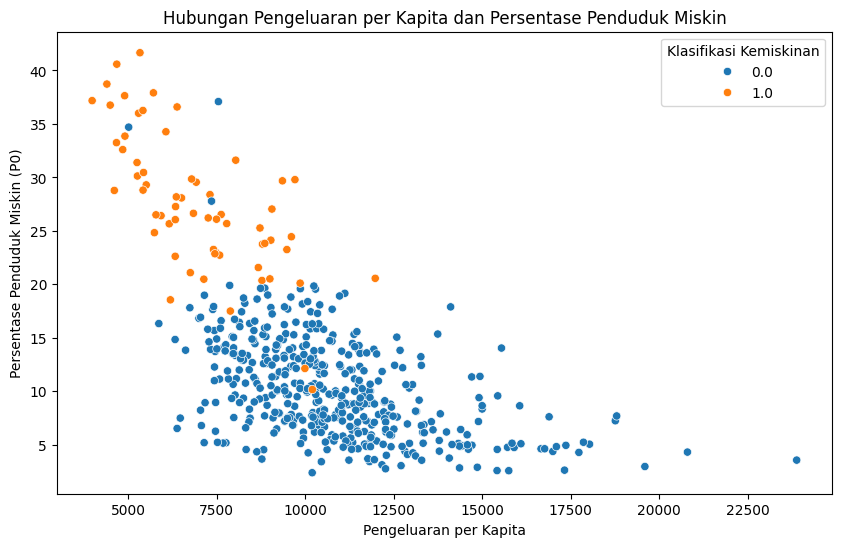

In [15]:
# Visualisasi hubungan antara pengeluaran per kapita dan tingkat kemiskinan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Pengeluaran_per_Kapita', y='P0_Persen', hue='Klasifikasi_Kemiskinan')
plt.title('Hubungan Pengeluaran per Kapita dan Persentase Penduduk Miskin')
plt.xlabel('Pengeluaran per Kapita')
plt.ylabel('Persentase Penduduk Miskin (P0)')
plt.legend(title='Klasifikasi Kemiskinan')
plt.show()